<a href="https://colab.research.google.com/github/Guiandreis/pneumonia_detection/blob/main/model_development/EDA_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT KAGGLE DATASET AND EXTRACT

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guilhermerandreis","key":"993e325e5288d22c0d7d94e16ab76edd"}'}

In [3]:
! mkdir ~/.kaggle/

In [4]:
! cp kaggle.json ~/.kaggle/ 


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           5977        179  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35            757         25  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           4554        112  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:12<00:00, 236MB/s]
100% 2.29G/2.29G [00:12<00:00, 203MB/s]


In [8]:
import zipfile

In [9]:
path_to_zip_file = '/content/chest-xray-pneumonia.zip'
directory_to_extract_to = '/content/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# IMPORT PACKAGES

In [10]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
import random
import os

# EXPLORATORY DATA ANALYSIS

In [11]:
train_path = glob.glob('/content/chest_xray/train/*/*')
test_path = glob.glob('/content/chest_xray/test/*/*')
val_path = glob.glob('/content/chest_xray/val/*/*')
total_images_path = train_path + test_path + val_path

len(train_path),len(test_path),len(val_path),len(total_images_path)

(5216, 624, 16, 5856)

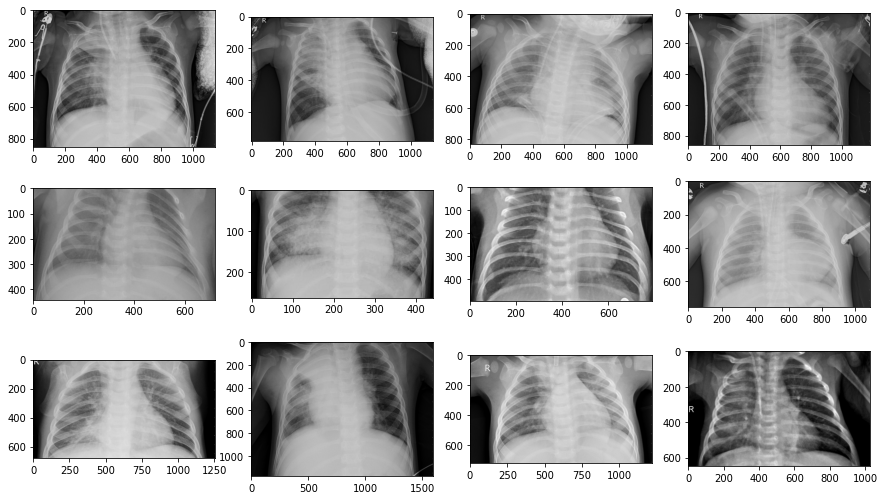

In [60]:
plt.figure(figsize=(15,25))
for k in range(12):
  image = cv2.imread(train_path[k])
  plt.subplot(3,4, k+1)
  
  plt.subplots_adjust(

                    #right=0.4,
                    top=0.4,
                    wspace=0.2,
                    hspace=0
                    )
  plt.imshow(image)


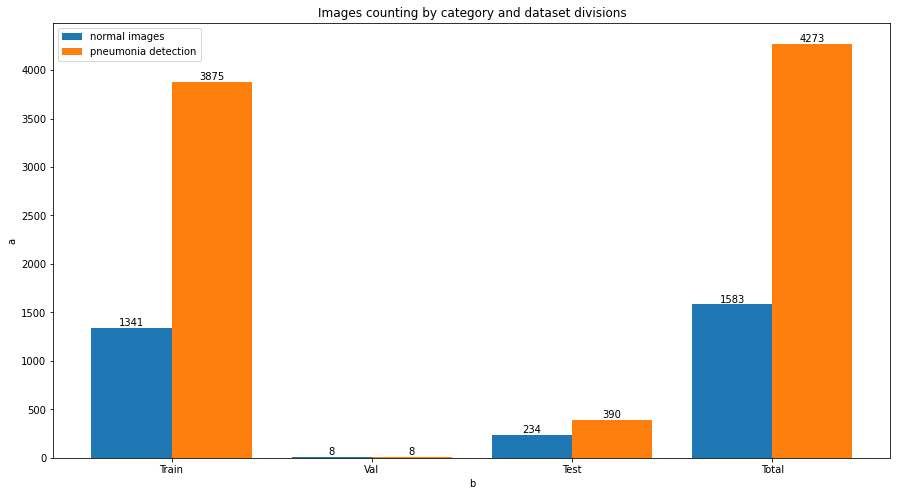

In [67]:
N = 4

pneumonia_images_train = glob.glob('/content/chest_xray/chest_xray/train/PNEUMONIA/*')
normal_images_train = glob.glob('/content/chest_xray/chest_xray/train/NORMAL/*')

pneumonia_images_val = glob.glob('/content/chest_xray/chest_xray/val/PNEUMONIA/*')
normal_images_val = glob.glob('/content/chest_xray/chest_xray/val/NORMAL/*')

pneumonia_images_test = glob.glob('/content/chest_xray/chest_xray/test/PNEUMONIA/*')
normal_images_test = glob.glob('/content/chest_xray/chest_xray/test/NORMAL/*')

total_pneumonia_images = glob.glob('/content/chest_xray/chest_xray/*/PNEUMONIA/*')
total_normal_images = glob.glob('/content/chest_xray/chest_xray/*/NORMAL/*')

idx = np.arange(N)

width = 0.4

blue_bar = (len(normal_images_train), len(normal_images_val), len(normal_images_test), len(total_normal_images))
orange_bar = (len(pneumonia_images_train), len(pneumonia_images_val), len(pneumonia_images_test), len(total_pneumonia_images))

plt.figure(figsize = (15,8))
bar_blue = plt.bar(idx, blue_bar, width, label = 'normal images')
bar_orange = plt.bar(idx + width, orange_bar, width, label = 'pneumonia detection')

plt.xlabel('b')
plt.ylabel('a')
plt.title('Images counting by category and dataset divisions')
plt.xticks(idx + width/2, ('Train', 'Val', 'Test', 'Total'))
plt.legend(loc = 'best')

for rect in bar_blue + bar_orange:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha = 'center', va = 'bottom')
plt.show()